In [1]:
import yfinance as yf  #To download stock prices

#Importing other modules
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Downloading the price history

In [2]:
#What is ticker data?

#A stock ticker is a report of the price of certain securities, updated continuously
#throughout the trading session by the various stock market exchanges

#The Ticker module, which allows you to access ticker data in a more Pythonic way
msft=yf.Ticker('MSFT') 

# get historical market data
msft=msft.history(period='max')   #msft is a dataframe

In [3]:
msft.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055380,0.063524,0.055380,0.060809,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060809,0.064067,0.060809,0.062980,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062980,0.064609,0.062980,0.064067,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.064067,0.064609,0.061894,0.062437,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062437,0.062980,0.060809,0.061351,47894400,0.0,0.0


<AxesSubplot:xlabel='Date'>

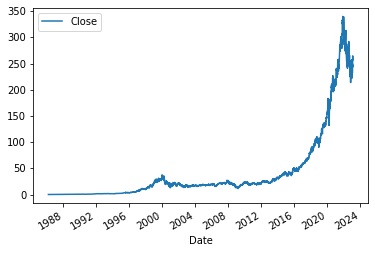

In [4]:
msft.plot.line(y='Close',use_index=True)

## Repairing the data from ML

In [5]:
data=msft[['Close']]
data.head(5)

,Close
Date,
1986-03-13 00:00:00-05:00,0.060809
1986-03-14 00:00:00-05:00,0.062980
1986-03-17 00:00:00-05:00,0.064067
1986-03-18 00:00:00-05:00,0.062437
1986-03-19 00:00:00-05:00,0.061351


In [6]:
data=data.rename(columns={'Close':'Actual_Closed'})
data.head(5)

,Actual_Closed
Date,
1986-03-13 00:00:00-05:00,0.060809
1986-03-14 00:00:00-05:00,0.062980
1986-03-17 00:00:00-05:00,0.064067
1986-03-18 00:00:00-05:00,0.062437
1986-03-19 00:00:00-05:00,0.061351


In [7]:
data['Target']=msft.rolling(2).apply(lambda x:x.iloc[1]>x.iloc[0])['Close']

In [8]:
data.head(5) 
# If the price has gone up on that day than previous day 
# we set it to 1 and if it has gown down than previous day we set it to 0

,Actual_Closed,Target
Date,,
1986-03-13 00:00:00-05:00,0.060809,NaN
1986-03-14 00:00:00-05:00,0.062980,1.0
1986-03-17 00:00:00-05:00,0.064067,1.0
1986-03-18 00:00:00-05:00,0.062437,0.0
1986-03-19 00:00:00-05:00,0.061351,0.0


In [9]:
msft_prev=msft.copy()

In [10]:
msft_prev=msft_prev.shift(1)

In [11]:
msft_prev.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14 00:00:00-05:00,0.055380,0.063524,0.055380,0.060809,1.031789e+09,0.0,0.0
1986-03-17 00:00:00-05:00,0.060809,0.064067,0.060809,0.062980,3.081600e+08,0.0,0.0
1986-03-18 00:00:00-05:00,0.062980,0.064609,0.062980,0.064067,1.331712e+08,0.0,0.0
1986-03-19 00:00:00-05:00,0.064067,0.064609,0.061894,0.062437,6.776640e+07,0.0,0.0


In [12]:
 predictors=["Close","High","Low","Open","Volume"]
 data=data.join(msft_prev[predictors]).iloc[1:]

In [13]:
# NOTE, WE CAN CREATE THIS IN PANDAS ALSO

In [16]:
from sklearn.ensemble import RandomForestClassifier
# https://www.youtube.com/watch?v=v6VJ2RO66Ag